In [1]:
import matplotlib.pyplot as plt
import numpy
from sklearn import datasets
import os
import pandas as pd

In [17]:
csv_path = '../myenv/lib/python3.10/site-packages/sklearn/datasets/data/boston_house_prices.csv'
df = pd.read_csv(csv_path, header=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Text(0, 0.5, 'Price')

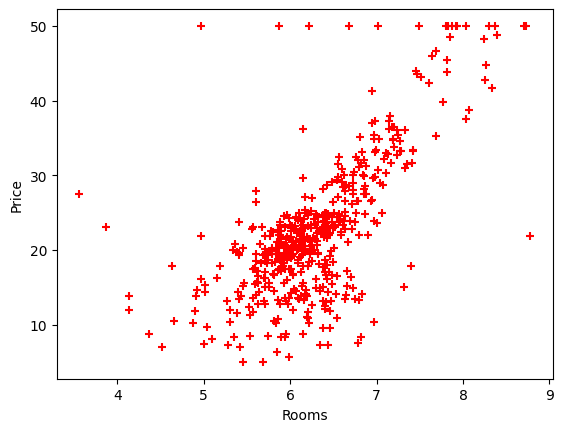

In [24]:
# df['RM'], df['MEDV']
plt.scatter(df['RM'], df['MEDV'], color="red", marker='+')
plt.xlabel('Rooms')
plt.ylabel('Price')

In [2]:
import numpy as np


def f_x(x, theta0, theta1):
  return theta0 + theta1 * x


def mean_array(arr):
  sum = 0
  size = len(arr)
  for i in range(size):
    sum += arr[i]

  return sum/size


def gradient_theta0(x, y, theta0, theta1):
  return mean_array(f_x(x, theta0, theta1) - y)


def gradient_theta1(x, y, theta0, theta1):
  return mean_array((f_x(x, theta0, theta1) - y) * x)


def gradient_descent(x, y, alpha, n):
  theta0 = 0.0
  theta1 = 0.0
  for i in range(n):
    det_theta0 = gradient_theta0(x, y, theta0, theta1)
    det_theta1 = gradient_theta1(x, y, theta0, theta1)
    theta0 -= alpha * det_theta0
    theta1 -= alpha * det_theta1
  return theta0, theta1


def cost_j(x, y, theta0, theta1):
  return mean_array((f_x(x, theta0, theta1) - y) ** 2) / 2

In [26]:
import numpy as np
x = df['RM']
y = df['MEDV']
alpha = 0.001
n = 10000

theta0, theta1 = gradient_descent(x, y, alpha, n)
theta0, theta1, cost_j(x, y, theta0, theta1)

(np.float64(-3.4310659301168522),
 np.float64(4.19109258456824),
 np.float64(27.812250017887884))

Text(0, 0.5, 'Price')

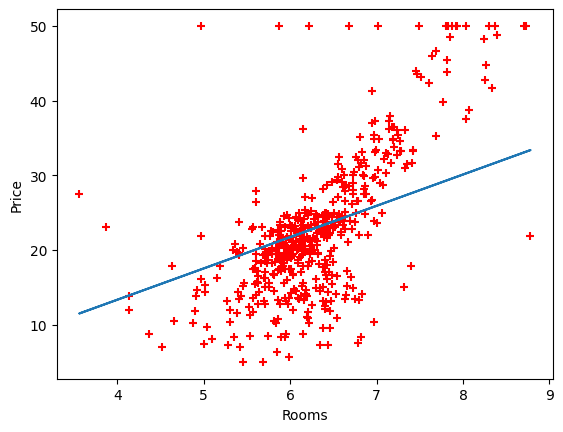

In [30]:
plt.plot(x, f_x(x, theta0, theta1))

plt.scatter(x, y, color="red", marker='+')
plt.xlabel('Rooms')
plt.ylabel('Price')

In [3]:
csv_path = './data/train.csv'
df = pd.read_csv(csv_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
x = df['LotArea'] / 1000
y = df['SalePrice'] / 1000
alpha = 0.001
n = 10000

theta0, theta1 = gradient_descent(x, y, alpha, n)
theta0, theta1, cost_j(x, y, theta0, theta1)

(np.float64(157.4336676886466),
 np.float64(2.1703128699303846),
 np.float64(2934.3419580391155))

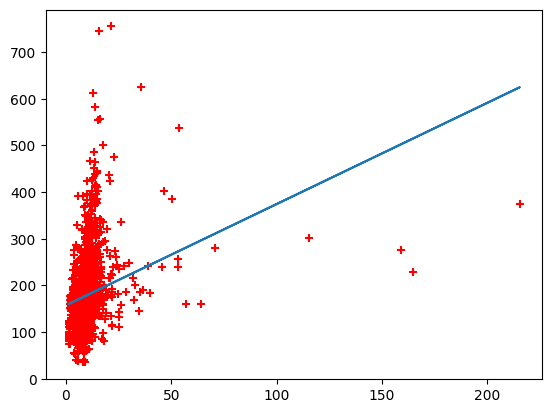

In [7]:
plt.scatter(x, y, color="red", marker='+')
plt.plot(x, f_x(x, theta0, theta1))